# Leads Case Study 

1. Importing & Analysing Data 
2. Data Cleaning & EDA
3. Preparing Data for model building
4. Building Logistics regression model
5. Prediction and Model Evaluation - Train Set 
6. Prediction and Model Evaluation - Test Set 
7. Results 

### 1. Importing & Analysing Data

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset to csv

df = pd.read_csv(r'C:\Users\Saurabh\Downloads\Files\Leads.csv', sep=",", encoding="ISO-8859-1", header=0)
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### 2. Data Cleaning & EDA
#### 2.1 Categorical Features

In [6]:
#checking the percentage of null values in each row.
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [7]:
#dropping columns with more than 45% missing values

cols=df.columns

for i in cols:
    if((100*(df[i].isnull().sum()/len(df.index))) >= 45):
        df.drop(i, 1, inplace = True)

In [8]:
#checking value counts of Country column

df['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
South Africa               4
Germany                    4
Canada                     4
Nigeria                    4
Kuwait                     4
Sweden                     3
Ghana                      2
Bangladesh                 2
Uganda                     2
China                      2
Asia/Pacific Region        2
Netherlands                2
Italy                      2
Philippines                2
Belgium                    2
Vietnam                    1
Denmark                    1
Liberia                    1
Malaysia                   1
Indonesia                  1
Kenya                      1
Russia        

Number of Values for India are high and this can cause imbalance in data. Its better to drop this column 

In [9]:
df.drop('Country', 1, inplace=True)

In [10]:
#checking value counts of "City" column

df['City'].value_counts(dropna=False)

Mumbai                         3222
Select                         2249
NaN                            1420
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Many features have SELECT value. It just signifies null value. Replacing select with nan.

In [11]:
df=df.replace('Select', np.nan)

In [12]:
#checking null value percentage again
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
#dropping How did you hear about X Education, Lead profile as now they have much null values
df.drop(['Lead Profile','How did you hear about X Education'], 1, inplace=True)

In [14]:
df['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [15]:
#Can be replaced with MODE value, which is Mumbai.
df['City'] = df['City'].replace(np.nan,'Mumbai') 

In [16]:
#Function for plotting value counts and value counts with respect to converted feature.
def value_plots(feature):
    
    plt.figure(1)
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    p1=sns.countplot(x=df[feature])
    p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
    plt.subplot(122)
    p2=sns.countplot(x=df[feature], hue=df.Converted)
    p2.set_xticklabels(p2.get_xticklabels(),rotation=90)
    plt.show()

<Figure size 432x288 with 0 Axes>

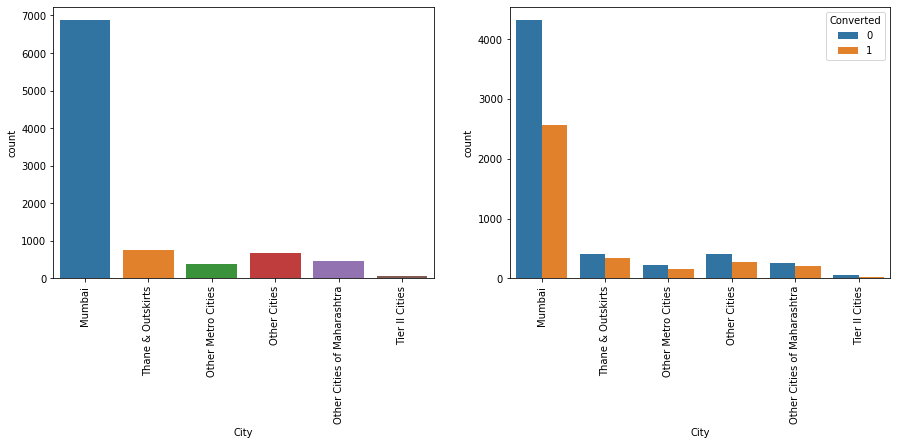

In [17]:
value_plots('City')  

In [18]:
#checking value counts of Specialization column

df['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [19]:
#There are many null values and no clear mode value in the categories so replacing null values with 'No Specialization'

df['Specialization'] = df['Specialization'].replace(np.nan, 'No Specialization')

<Figure size 432x288 with 0 Axes>

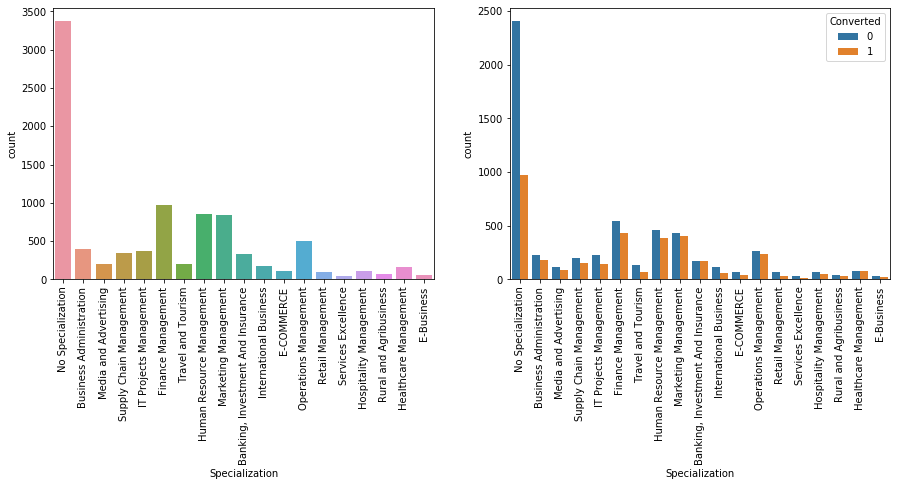

In [20]:
#plotting spread of Specialization columnn 

value_plots('Specialization')

There are many categories in the data so it will be better to group similar performing categories together.

In [21]:
#There are many managemnt specialization and can be grouped together.

df['Specialization'] = df['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

<Figure size 432x288 with 0 Axes>

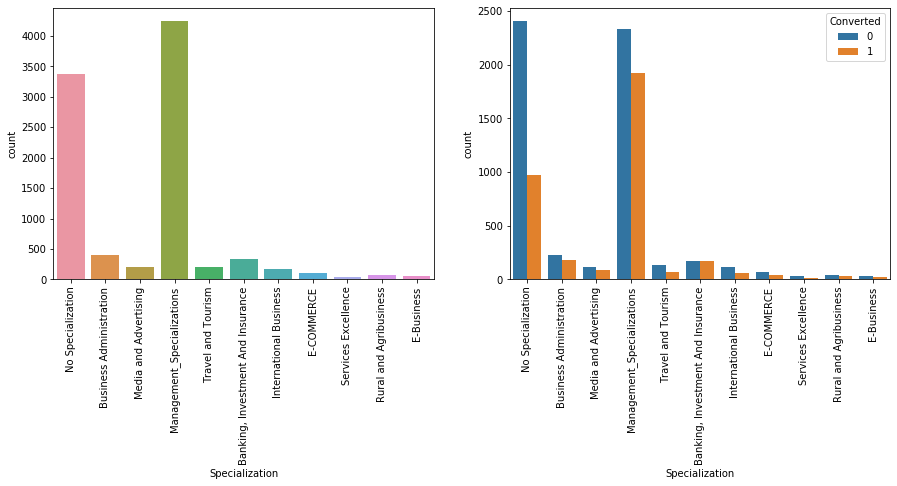

In [22]:
value_plots('Specialization')

In [23]:
#What is your current occupation

df['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [24]:
#imputing Nan values with mode "Unemployed"

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

In [25]:
#checking count of values
df['What is your current occupation'].value_counts(dropna=False)

Unemployed              8290
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

<Figure size 432x288 with 0 Axes>

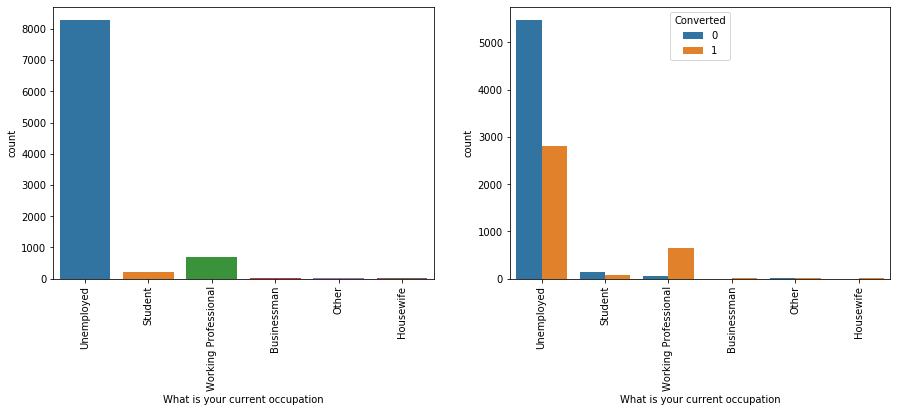

In [26]:
#visualizing count of Variable based on Converted value

value_plots('What is your current occupation')

1. Working Professionals going for the course have high chances of joining it.


In [27]:
#checking value counts

df['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [28]:
# we can drop this column as it will also cause high imbalance
df.drop('What matters most to you in choosing a course', 1, inplace=True)

In [29]:
#checking value counts of Tag variable 
df['Tags'].value_counts(dropna=False)

NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with 

Null values can be replaced with 'Not Specified'


In [30]:
#replacing Nan values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

<Figure size 432x288 with 0 Axes>

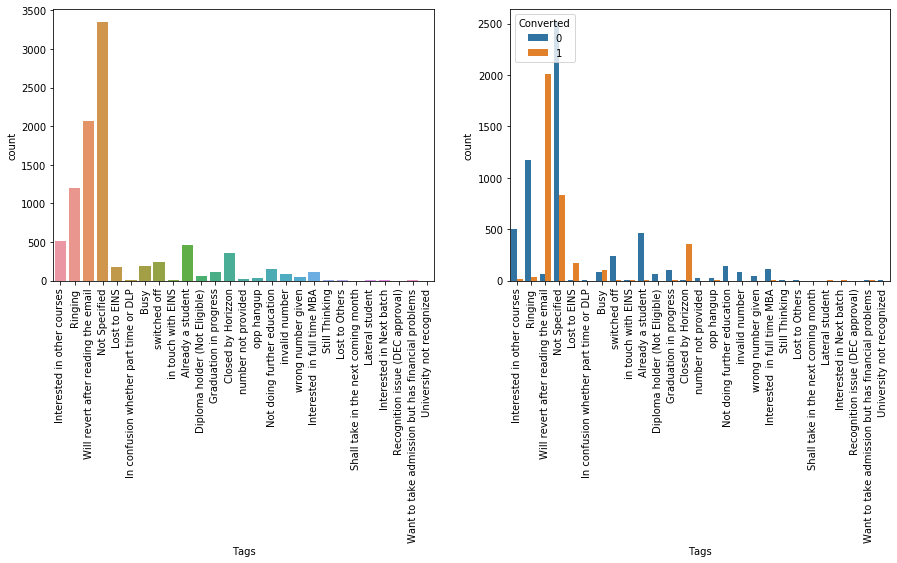

In [31]:
#visualizing count of Variable based on Converted value

value_plots('Tags')

Less frquent categories under Tag can be grouped together in order reudce the number of categories

In [32]:
#replacing tags with low frequency with "Other Tags"
df['Tags'] = df['Tags'].replace(['In confusion whether part time or DLP','Already a student','in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized','in touch with EINS','invalid number','Not doing further education','wrong number given','Interested  in full time MBA'], 'Other_Tags')



<Figure size 432x288 with 0 Axes>

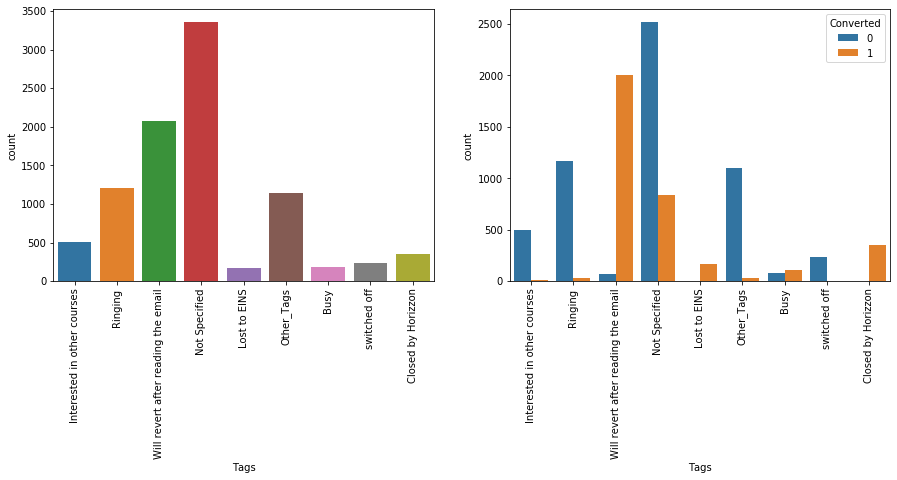

In [33]:
value_plots('Tags')

In [34]:
#checking percentage of missing values
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.39
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               1.11
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [35]:
#checking value counts of Lead Source column

df['Lead Source'].value_counts(dropna=False)

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
NC_EDM                  1
youtubechannel          1
blog                    1
testone                 1
WeLearn                 1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [36]:
#replacing Nan Values
df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')
df['Lead Source'] = df['Lead Source'].replace('google','Google')

In [37]:
#Grouping all other low performing categories to others.

df['Lead Source'] = df['Lead Source'].replace(['bing','Click2call','Press_Release',
                                                     'youtubechannel','welearnblog_Home',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Others')                                                   

We can group some of the lower frequency occuring labels under a common label 'Others' 

<Figure size 432x288 with 0 Axes>

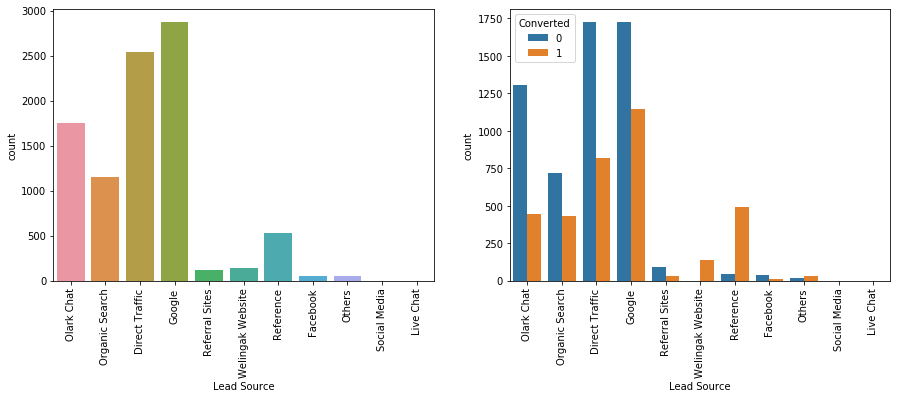

In [38]:
#visualizing count of Variable with converted values
value_plots('Lead Source')

In [39]:
# Last Activity:

df['Last Activity'].value_counts(dropna=False)

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [40]:
df['Last Activity'] = df['Last Activity'].replace(np.nan,'Others')

In [41]:
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [42]:
df['Last Activity'].value_counts(dropna=False)

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: Last Activity, dtype: int64

<Figure size 432x288 with 0 Axes>

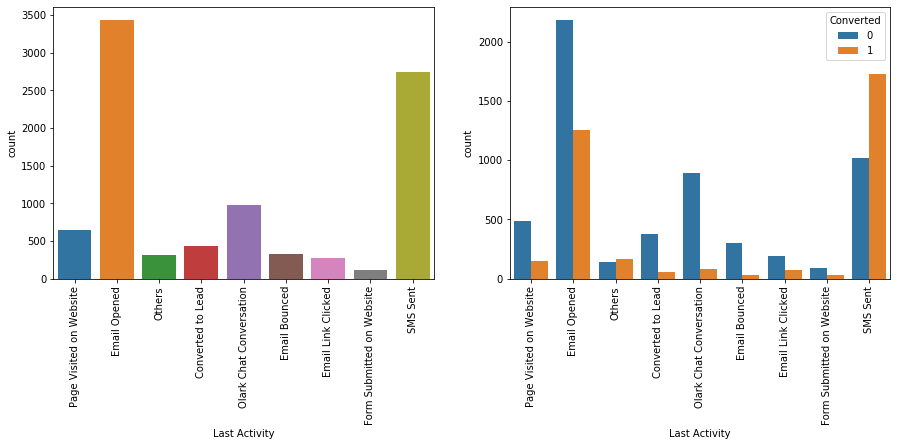

In [43]:
value_plots('Last Activity')

In [44]:
#Check the Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                 0.00
Lead Number                                 0.00
Lead Origin                                 0.00
Lead Source                                 0.00
Do Not Email                                0.00
Do Not Call                                 0.00
Converted                                   0.00
TotalVisits                                 1.48
Total Time Spent on Website                 0.00
Page Views Per Visit                        1.48
Last Activity                               0.00
Specialization                              0.00
What is your current occupation             0.00
Search                                      0.00
Magazine                                    0.00
Newspaper Article                           0.00
X Education Forums                          0.00
Newspaper                                   0.00
Digital Advertisement                       0.00
Through Recommendations                     0.00
Receive More Updates

In [45]:
#Dropping the rows with null values.
df = df.dropna()

In [46]:
#Checking percentage of Null Values in All Columns:
round(100*(df.isnull().sum()/len(df.index)), 2)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses  

In [47]:
#Lead Origin
df['Lead Origin'].value_counts(dropna=False)

Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: Lead Origin, dtype: int64

<Figure size 432x288 with 0 Axes>

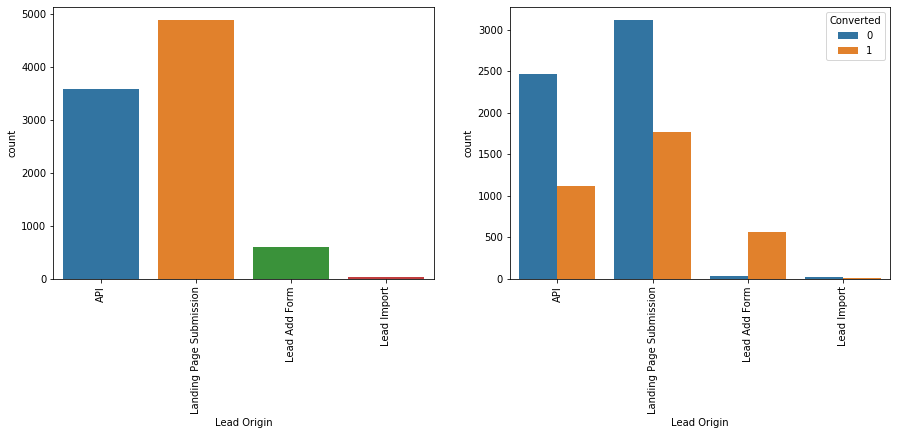

In [48]:
#visualizing count of Variable based on Converted value

value_plots('Lead Origin')

1. Landing Page Submission has higher number of conversion.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.

In [49]:
#checking value counts for Do Not Call
df['Do Not Call'].value_counts(dropna=False)

No     9101
Yes       2
Name: Do Not Call, dtype: int64

In [50]:
#checking value counts for Do Not Email
df['Do Not Email'].value_counts(dropna=False)

No     8379
Yes     724
Name: Do Not Email, dtype: int64

In [51]:
df.drop(['Do Not Call'], 1, inplace=True)

In [52]:
df.Search.value_counts(dropna=False)

No     9089
Yes      14
Name: Search, dtype: int64

In [53]:
df.Magazine.value_counts(dropna=False)

No    9103
Name: Magazine, dtype: int64

In [54]:
df['Newspaper Article'].value_counts(dropna=False)

No     9101
Yes       2
Name: Newspaper Article, dtype: int64

In [55]:
df['X Education Forums'].value_counts(dropna=False)

No     9102
Yes       1
Name: X Education Forums, dtype: int64

In [56]:
df['Newspaper'].value_counts(dropna=False)

No     9102
Yes       1
Name: Newspaper, dtype: int64

In [57]:
df['Digital Advertisement'].value_counts(dropna=False)

No     9099
Yes       4
Name: Digital Advertisement, dtype: int64

In [58]:
df['Through Recommendations'].value_counts(dropna=False)

No     9096
Yes       7
Name: Through Recommendations, dtype: int64

In [59]:
df['Receive More Updates About Our Courses'].value_counts(dropna=False)

No    9103
Name: Receive More Updates About Our Courses, dtype: int64

In [60]:
df['Update me on Supply Chain Content'].value_counts(dropna=False)

No    9103
Name: Update me on Supply Chain Content, dtype: int64

In [61]:
df['Get updates on DM Content'].value_counts(dropna=False)

No    9103
Name: Get updates on DM Content, dtype: int64

In [62]:
df['I agree to pay the amount through cheque'].value_counts(dropna=False)

No    9103
Name: I agree to pay the amount through cheque, dtype: int64

In [63]:
df['A free copy of Mastering The Interview'].value_counts(dropna=False)

No     6215
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64

In [64]:
#Dropping all the columns which have imbalance values.

Col_del= ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque']

In [65]:
df.drop(labels=Col_del, axis=1, inplace=True)

In [66]:
#checking value counts of last Notable Activity
df['Last Notable Activity'].value_counts()

Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Email Received                     1
Approached upfront                 1
Resubscribed to emails             1
Form Submitted on Website          1
View in browser link Clicked       1
Name: Last Notable Activity, dtype: int64

In [67]:
#clubbing lower frequency values

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Other_Notable_activity')

<Figure size 432x288 with 0 Axes>

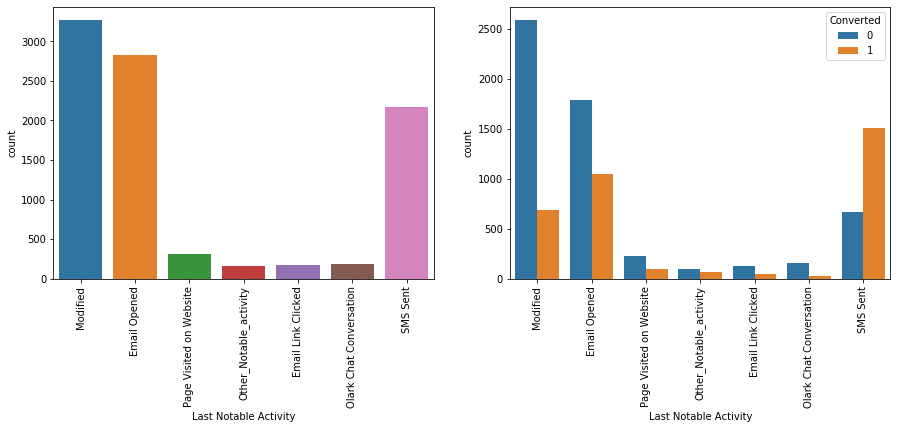

In [68]:
#visualizing count of Variable based on Converted value
value_plots('Last Notable Activity')

In [69]:
#checking value counts for variable

df['Last Notable Activity'].value_counts()

Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: Last Notable Activity, dtype: int64

#### 2.2 Numerical Features 

In [70]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(df['Converted'])/len(df['Converted'].index))*100
Converted

38.02043282434362

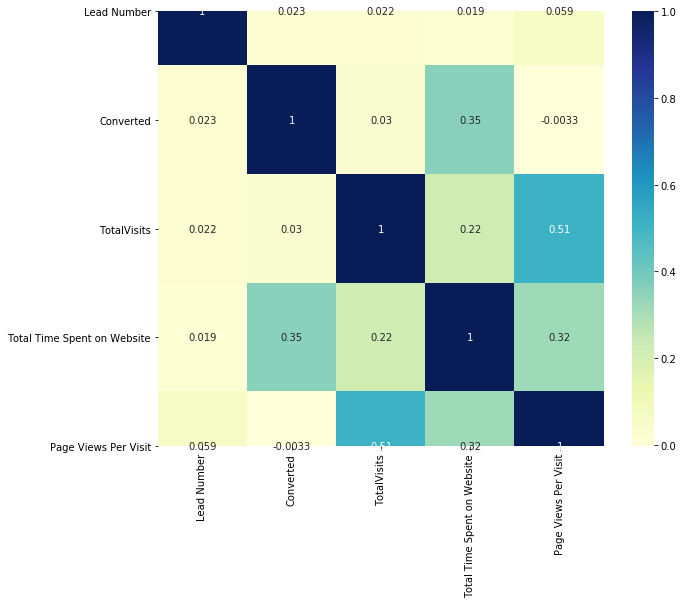

In [71]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

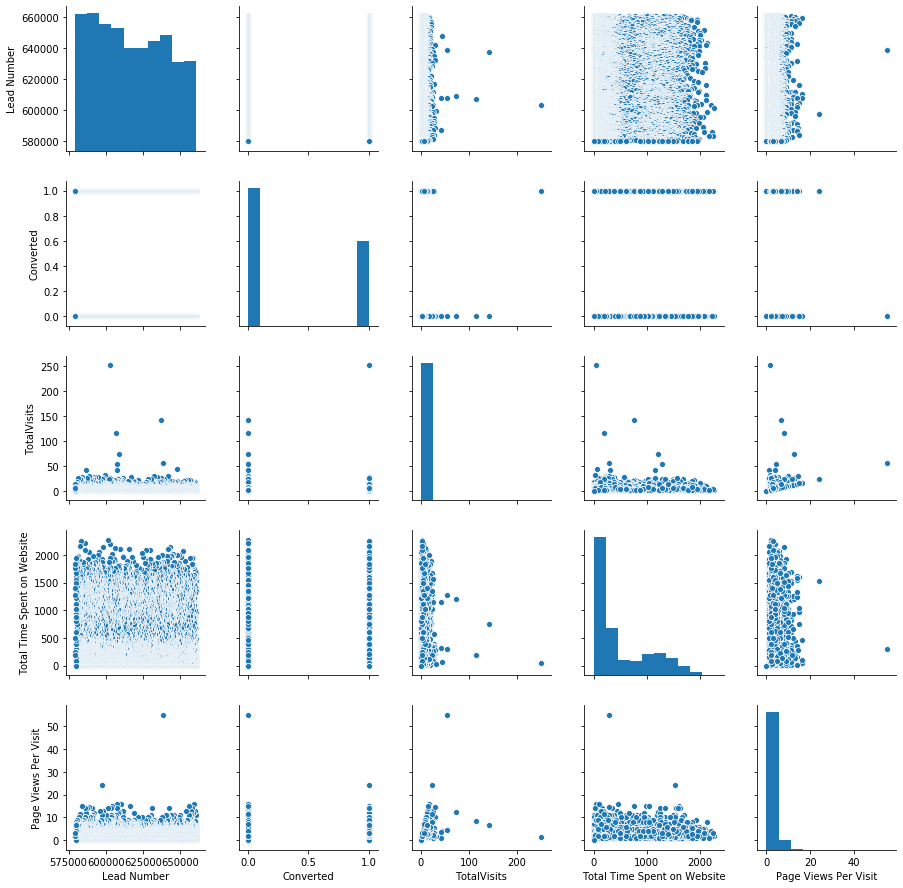

In [72]:
sns.pairplot(df)

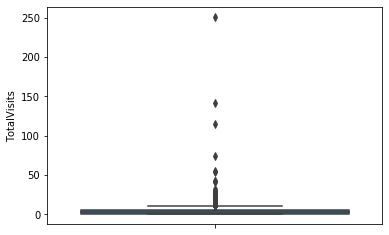

In [73]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['TotalVisits'])
plt.show()

We can see presence of outliers here

In [74]:
#checking percentile values for "Total Visits"

df['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

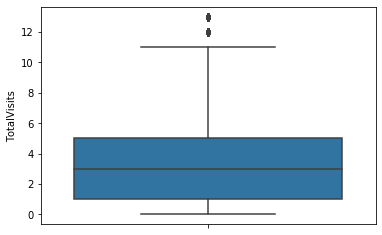

In [75]:
#Remove top & bottom 2% of the Column Outlier values

val = df.TotalVisits.quantile(0.98)
df['TotalVisits'][df['TotalVisits'] >= val]=val
sns.boxplot(y=df['TotalVisits'])
plt.show()

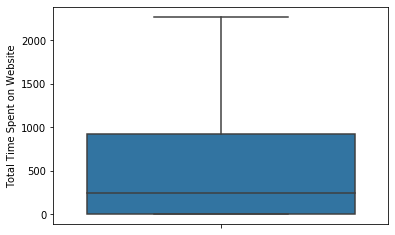

In [77]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Total Time Spent on Website'])
plt.show()

In [78]:
#checking spread of "Page Views Per Visit"

df['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

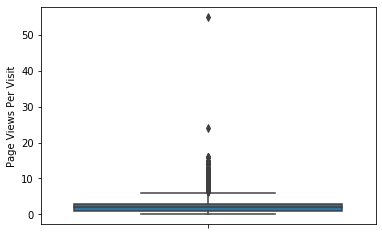

In [79]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

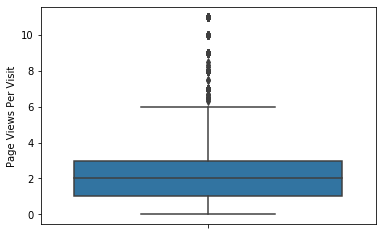

In [80]:
#Capping top 3% of the Column Outlier values

val = df.TotalVisits.quantile(0.97)
df['Page Views Per Visit'][df['Page Views Per Visit'] >= val]=val
sns.boxplot(y=df['Page Views Per Visit'])
plt.show()

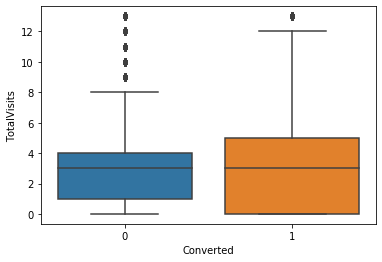

In [81]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df)
plt.show()

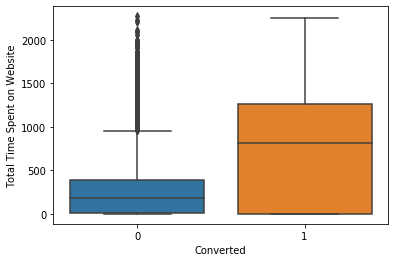

In [82]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=df.Converted, y=df['Total Time Spent on Website'])
plt.show()

1. Leads spending more time on the website are more likely to be converted.

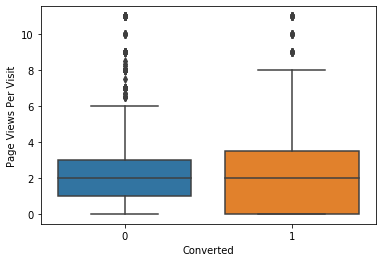

In [83]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=df.Converted,y=df['Page Views Per Visit'])
plt.show()

### 3. Preparing data for Model Building 

In [84]:
# List of variables to map

varlist =  ['A free copy of Mastering The Interview','Do Not Email']

def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df[varlist] = df[varlist].apply(binary_map)

In [85]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Specialization', 'What is your current occupation', 'Tags', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [86]:
dummy = pd.get_dummies(df['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_No Specialization'], 1)
df = pd.concat([df, dummy], axis = 1)

In [87]:
dummy = pd.get_dummies(df['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [88]:
dummy = pd.get_dummies(df['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], 1)
df = pd.concat([df, dummy], axis = 1)

In [89]:
dummy = pd.get_dummies(df['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], 1)
df = pd.concat([df, dummy], axis = 1)

In [90]:
dummy = pd.get_dummies(df['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], 1)
df = pd.concat([df, dummy], axis = 1)

In [91]:
dummy = pd.get_dummies(df['Lead Origin'], prefix  = 'Lead Origin')
dummy = dummy.drop(['Lead Origin_Lead Import'], 1)
df = pd.concat([df, dummy], axis = 1)

In [92]:
dummy = pd.get_dummies(df['What is your current occupation'])
dummy = dummy.drop(['Other'], 1)
df = pd.concat([df, dummy], axis = 1)

In [93]:
dummy = pd.get_dummies(df['City'])
dummy = dummy.drop(['Tier II Cities'], 1)
df = pd.concat([df, dummy], axis = 1)

In [94]:
cat_cols= df.select_dtypes(include=['object']).columns
df.drop(cat_cols, 1 ,inplace=True)

In [95]:
from sklearn.model_selection import train_test_split

y = df['Converted'] #getting y as response variable
X=df.drop('Converted', axis=1)  #rest of the data in X

In [96]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [97]:
#scaling numeric columns using min/max scaler

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Businessman,Housewife,Student,Unemployed,Working Professional,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts
7962,0.114059,0.0,0.230769,0.570794,0.136364,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
5520,0.345132,0.0,0.538462,0.026631,0.636364,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1962,0.752460,0.0,0.384615,0.075011,0.227273,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1566,0.792943,0.0,1.000000,0.550821,0.318182,0.0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
9170,0.007488,0.0,0.000000,0.000000,0.000000,0.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


### 4. Building Logistic Regression Model

In [98]:
import statsmodels.api as sm

In [99]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 22)             # running RFE with 22 variables as output
rfe = rfe.fit(X_train, y_train)

In [100]:
rfe.support_

array([False,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True, False,  True, False,  True, False,
       False, False, False, False, False, False,  True,  True, False,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False])

In [101]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Number', False, 7),
 ('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 30),
 ('Specialization_Banking, Investment And Insurance', False, 26),
 ('Specialization_Business Administration', False, 31),
 ('Specialization_E-Business', False, 18),
 ('Specialization_E-COMMERCE', False, 15),
 ('Specialization_International Business', False, 20),
 ('Specialization_Management_Specializations', False, 36),
 ('Specialization_Media and Advertising', False, 38),
 ('Specialization_Rural and Agribusiness', False, 37),
 ('Specialization_Services Excellence', False, 5),
 ('Specialization_Travel and Tourism', False, 14),
 ('Lead Source_Direct Traffic', True, 1),
 ('Lead Source_Facebook', False, 11),
 ('Lead Source_Google', True, 1),
 ('Lead Source_Live Chat', False, 39),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Search', True, 1),
 ('Lead Source

In [102]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Closed by Horizzon',
       'Tags_Interested in other courses', 'Tags_Lost to EINS',
       'Tags_Other_Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Origin_Lead Add Form'],
      dtype='object')

In [103]:
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1231.2
Date:                Sat, 05 Sep 2020   Deviance:                       2462.4
Time:                        10:03:04   Pearson chi2:                 9.43e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3616      0.123    -11.059      0.000      -1.603      -1.120
Do Not Email                                     -0.8810      0.242     -3.643      0.000      -1.355      -0.407
TotalVisits                                       1.1097      0.332      3.338      0.001       0.458       1.761
Total Time Spent on Website                       4.3935      0.254     17.308      0.000       3.896       4.891
Page Views Per Visit                             -1.6588      0.468     -3.545      0.000      -2.576      -0.742
Lead Source_Direct Traffic                       -1.3302      0.199     -6.694      0.000      -1.720      -0.941
Lead Source_Google                               -0.9700      0.188     -5.154      0.000      -1.339      -0.601
Lead Source_Organic Search                       -0.9435      0.240     -3.930      0.000      -1.414      -0.473
Lead Source_Referral Sites                       -1.1730      0.531     -2.208      0.027      -2.214      -0.132
Lead Source_Welingak Website                      3.4286      0.837      4.095      0.000       1.788       5.069
Last Activity_SMS Sent                            1.5260      0.231      6.597      0.000       1.073       1.979
Last Notable Activity_Email Link Clicked         -1.0386      0.423     -2.456      0.014      -1.868      -0.210
Last Notable Activity_Modified                   -1.4741      0.157     -9.386      0.000      -1.782      -1.166
Last Notable Activity_Olark Chat Conversation    -1.7952      0.422     -4.252      0.000      -2.623      -0.968
Last Notable Activity_SMS Sent                    0.6077      0.265      2.292      0.022       0.088       1.127
Tags_Closed by Horizzon                           6.4579      0.735      8.785      0.000       5.017       7.899
Tags_Interested in other courses                 -1.9951      0.373     -5.345      0.000      -2.727      -1.264
Tags_Lost to EINS                                 6.2816      0.732      8.581      0.000       4.847       7.716
Tags_Other_Tags                                  -2.0667      0.228     -9.064      0.000      -2.514      -1.620
Tags_Ringing                                     -3.5622      0.252    -14.157      0.000      -4.055      -3.069
Tags_Will revert after reading the email          4.5447      0.193     23.607      0.000       4.167       4.922
Tags_switched off                                -3.6883      0.614     -6.006      0.000      -4.892      -2.485
Lead Origin_Lead Add Form                         0.9658      0.424      2.280      0.023       0.136       1.796
=================================================================================================================
"""

In [104]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_SMS Sent,6.38
9,Last Activity_SMS Sent,6.24
3,Page Views Per Visit,6.21
1,TotalVisits,5.09
5,Lead Source_Google,3.62
4,Lead Source_Direct Traffic,3.17
2,Total Time Spent on Website,2.61
6,Lead Source_Organic Search,2.47
11,Last Notable Activity_Modified,1.94
19,Tags_Will revert after reading the email,1.91


In [105]:
col = col.drop('Last Notable Activity_SMS Sent',1) #Dropping because of High VIF

In [106]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6350
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1233.9
Date:                Sat, 05 Sep 2020   Deviance:                       2467.7
Time:                        10:03:04   Pearson chi2:                 9.35e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2908      0.118    -10.916      0.000      -1.523      -1.059
Do Not Email                                     -0.8564      0.241     -3.556      0.000      -1.328      -0.384
TotalVisits                                       1.0561      0.331      3.189      0.001       0.407       1.705
Total Time Spent on Website                       4.3907      0.253     17.348      0.000       3.895       4.887
Page Views Per Visit                             -1.6476      0.465     -3.542      0.000      -2.559      -0.736
Lead Source_Direct Traffic                       -1.3437      0.198     -6.785      0.000      -1.732      -0.956
Lead Source_Google                               -0.9839      0.188     -5.245      0.000      -1.352      -0.616
Lead Source_Organic Search                       -0.9444      0.239     -3.950      0.000      -1.413      -0.476
Lead Source_Referral Sites                       -1.1873      0.529     -2.243      0.025      -2.225      -0.150
Lead Source_Welingak Website                      3.3990      0.838      4.055      0.000       1.756       5.042
Last Activity_SMS Sent                            1.9814      0.118     16.769      0.000       1.750       2.213
Last Notable Activity_Email Link Clicked         -1.1108      0.425     -2.616      0.009      -1.943      -0.279
Last Notable Activity_Modified                   -1.6957      0.128    -13.217      0.000      -1.947      -1.444
Last Notable Activity_Olark Chat Conversation    -1.8568      0.421     -4.406      0.000      -2.683      -1.031
Tags_Closed by Horizzon                           6.5809      0.735      8.949      0.000       5.140       8.022
Tags_Interested in other courses                 -1.9830      0.374     -5.298      0.000      -2.717      -1.249
Tags_Lost to EINS                                 6.3937      0.733      8.727      0.000       4.958       7.830
Tags_Other_Tags                                  -2.0559      0.227     -9.061      0.000      -2.501      -1.611
Tags_Ringing                                     -3.4906      0.248    -14.082      0.000      -3.976      -3.005
Tags_Will revert after reading the email          4.6033      0.194     23.761      0.000       4.224       4.983
Tags_switched off                                -3.6257      0.612     -5.924      0.000      -4.825      -2.426
Lead Origin_Lead Add Form                         0.9303      0.424      2.192      0.028       0.098       1.762
=================================================================================================================
"""

In [107]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,6.21
1,TotalVisits,5.09
5,Lead Source_Google,3.61
4,Lead Source_Direct Traffic,3.16
2,Total Time Spent on Website,2.61
6,Lead Source_Organic Search,2.46
18,Tags_Will revert after reading the email,1.87
20,Lead Origin_Lead Add Form,1.86
9,Last Activity_SMS Sent,1.63
11,Last Notable Activity_Modified,1.60


In [108]:
col = col.drop('Page Views Per Visit',1) #Dropping because of High VIF

In [109]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.2
Date:                Sat, 05 Sep 2020   Deviance:                       2480.4
Time:                        10:03:04   Pearson chi2:                 9.57e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.2877      0.118    -10.931      0.000      -1.519      -1.057
Do Not Email                                     -0.8544      0.241     -3.551      0.000      -1.326      -0.383
TotalVisits                                       0.4173      0.282      1.480      0.139      -0.135       0.970
Total Time Spent on Website                       4.3842      0.252     17.390      0.000       3.890       4.878
Lead Source_Direct Traffic                       -1.5553      0.189     -8.227      0.000      -1.926      -1.185
Lead Source_Google                               -1.2072      0.177     -6.829      0.000      -1.554      -0.861
Lead Source_Organic Search                       -1.2393      0.224     -5.539      0.000      -1.678      -0.801
Lead Source_Referral Sites                       -1.4192      0.530     -2.678      0.007      -2.458      -0.381
Lead Source_Welingak Website                      3.3682      0.838      4.021      0.000       1.726       5.010
Last Activity_SMS Sent                            1.9451      0.117     16.610      0.000       1.716       2.175
Last Notable Activity_Email Link Clicked         -1.1333      0.422     -2.683      0.007      -1.961      -0.305
Last Notable Activity_Modified                   -1.6967      0.128    -13.246      0.000      -1.948      -1.446
Last Notable Activity_Olark Chat Conversation    -1.7925      0.413     -4.336      0.000      -2.603      -0.982
Tags_Closed by Horizzon                           6.5630      0.734      8.944      0.000       5.125       8.001
Tags_Interested in other courses                 -1.9940      0.375     -5.320      0.000      -2.729      -1.259
Tags_Lost to EINS                                 6.3820      0.731      8.729      0.000       4.949       7.815
Tags_Other_Tags                                  -2.0539      0.226     -9.072      0.000      -2.498      -1.610
Tags_Ringing                                     -3.5145      0.248    -14.180      0.000      -4.000      -3.029
Tags_Will revert after reading the email          4.5660      0.193     23.649      0.000       4.188       4.944
Tags_switched off                                -3.5935      0.609     -5.896      0.000      -4.788      -2.399
Lead Origin_Lead Add Form                         0.9662      0.424      2.279      0.023       0.135       1.797
=================================================================================================================
"""

In [110]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,3.50
4,Lead Source_Google,3.17
3,Lead Source_Direct Traffic,2.84
2,Total Time Spent on Website,2.61
5,Lead Source_Organic Search,2.16
17,Tags_Will revert after reading the email,1.87
19,Lead Origin_Lead Add Form,1.86
8,Last Activity_SMS Sent,1.62
10,Last Notable Activity_Modified,1.60
7,Lead Source_Welingak Website,1.36


This model looks good for prediction with P-value and VIF in permissible limits.

### 5. Prediction and Model Evaluation - Train Set 

In [111]:
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.498768
5520    0.075751
1962    0.004723
1566    0.992632
9170    0.034173
5097    0.216245
8954    0.028444
309     0.939536
5519    0.658670
1050    0.985997
dtype: float64

In [112]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.49876755, 0.07575147, 0.00472255, 0.99263236, 0.03417334,
       0.21624468, 0.02844434, 0.939536  , 0.65866993, 0.9859968 ])

In [113]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,0,0.498768,7962
1,0,0.075751,5520
2,0,0.004723,1962
3,1,0.992632,1566
4,0,0.034173,9170


In [114]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,0,0.498768,7962,0
1,0,0.075751,5520,0
2,0,0.004723,1962,0
3,1,0.992632,1566,1
4,0,0.034173,9170,0


In [115]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3784  169]
 [ 293 2126]]


In [116]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9274952919020716


In [149]:
def confusion_met(c):
    TP = c[1,1] # true positive 
    TN = c[0,0] # true negatives
    FP = c[0,1] # false positives
    FN = c[1,0] # false negatives
    
    print("Sensitivity :", round(TP / float(TP+FN),3))
    print("Specificity :", round(TN / float(TN+FP),3))
    print("False Postive Rate :", round(FP/ float(TN+FP),3))
    print("Positive Predictive Value: ", round((TP / float(TP+FP)),3))
    print("Negative Predictive Value: ", round(TN / float(TN+ FN),3))
    p=round(TP / (TP + FP),2)
    r=round(TP / (TP + FN),2)
    print('Precision : ', p)
    print('Recall: ', r)
    f= ((p*r)/(p+r))*2
    print('F-measure: ',f)

In [150]:
confusion_met(confusion)

Sensitivity : 0.879
Specificity : 0.957
False Postive Rate : 0.043
Positive Predictive Value:  0.926
Negative Predictive Value:  0.928
Precision :  0.93
Recall:  0.88
F-measure:  0.9043093922651934


In [119]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [120]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

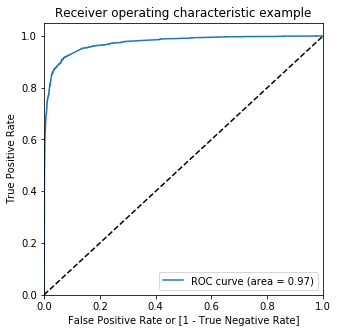

In [121]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [122]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.498768,7962,0,1,1,1,1,1,0,0,0,0,0
1,0,0.075751,5520,0,1,0,0,0,0,0,0,0,0,0
2,0,0.004723,1962,0,1,0,0,0,0,0,0,0,0,0
3,1,0.992632,1566,1,1,1,1,1,1,1,1,1,1,1
4,0,0.034173,9170,0,1,0,0,0,0,0,0,0,0,0


In [123]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.837728  0.972303  0.755376
0.2   0.2  0.898776  0.949566  0.867695
0.3   0.3  0.923729  0.913601  0.929927
0.4   0.4  0.924043  0.897065  0.940551
0.5   0.5  0.927495  0.878876  0.957248
0.6   0.6  0.927809  0.858619  0.970149
0.7   0.7  0.913685  0.806532  0.979256
0.8   0.8  0.903798  0.774287  0.983051
0.9   0.9  0.887790  0.719719  0.990640


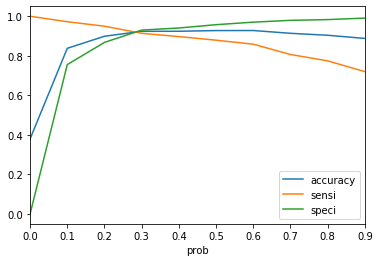

In [124]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [125]:
# From the curve 0.25 is the optimum point to take it as a cutoff.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,0,0.498768,7962,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.075751,5520,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.004723,1962,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.992632,1566,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0.034173,9170,0,1,0,0,0,0,0,0,0,0,0,0


In [126]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,0,0.498768,7962,1,50
1,0,0.075751,5520,0,8
2,0,0.004723,1962,0,0
3,1,0.992632,1566,1,99
4,0,0.034173,9170,0,3


In [127]:
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.923728813559322

In [128]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3676,  277],
       [ 209, 2210]], dtype=int64)

In [151]:
confusion_met(confusion2)

Sensitivity : 0.918
Specificity : 0.934
False Postive Rate : 0.066
Positive Predictive Value:  0.895
Negative Predictive Value:  0.949
Precision :  0.9
Recall:  0.92
F-measure:  0.90989010989011


Results from Training set
1. Accuracy : 92.37
2. Sensitivity : 91.4
3. Specificity : 93.00

### 6. Prediction and Model Evaluation - Test Set 

In [130]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,Lead Number,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Businessman,Housewife,Student,Unemployed,Working Professional,Mumbai,Other Cities,Other Cities of Maharashtra,Other Metro Cities,Thane & Outskirts
3504,0.583617,0.0,0.230769,0.186620,0.272727,1.0,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
4050,0.513019,0.0,0.000000,0.000000,0.000000,0.0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
7201,0.180018,1.0,0.153846,0.313380,0.181818,1.0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1196,0.834319,0.0,0.307692,0.186180,0.363636,1.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
8219,0.093618,0.0,0.538462,0.108715,0.159091,1.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [131]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Organic Search,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Origin_Lead Add Form
3504,0.0,0.230769,0.186620,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4050,0.0,0.000000,0.000000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
7201,1.0,0.153846,0.313380,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1196,0.0,0.307692,0.186180,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8219,0.0,0.538462,0.108715,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [132]:
X_test_sm = sm.add_constant(X_test)

In [133]:
y_test_pred = res.predict(X_test_sm)

In [134]:
y_test_pred[:10]

3504    0.005899
4050    0.997953
7201    0.085640
1196    0.006079
8219    0.985802
8747    0.216245
9048    0.523242
6524    0.002874
7693    0.030521
8187    0.131139
dtype: float64

In [135]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [136]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [137]:
y_test_df['Prospect ID'] = y_test_df.index

In [138]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [139]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [140]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [141]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,3504,0.005899
1,1,4050,0.997953
2,0,7201,0.085640
3,0,1196,0.006079
4,1,8219,0.985802


In [142]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [143]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,3504,0,0.005899,1
1,4050,1,0.997953,100
2,7201,0,0.085640,9
3,1196,0,0.006079,1
4,8219,1,0.985802,99


In [144]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.3 else 0)

In [145]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.927865250823874

In [146]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1577,  112],
       [  85,  957]], dtype=int64)

In [152]:
confusion_met(confusion2)

Sensitivity : 0.918
Specificity : 0.934
False Postive Rate : 0.066
Positive Predictive Value:  0.895
Negative Predictive Value:  0.949
Precision :  0.9
Recall:  0.92
F-measure:  0.90989010989011


### 7. Results 

##### 2. Train set 

1. Accuracy : 92.37%
2. Sensitivity : 91.40%
3. Specificity : 93.0%

##### 1. Test set 

1. Accuracy : 92.78%
2. Sensitivity : 91.80%
3. Specificity : 93.40%

False Postive Rate : 0.066
 Positive Predictive Value:  0.895
 Negative Predictive Value:  0.949
 Precision :  0.9
 Recall:  0.92

Train and Test data matches in model parameters and hence this seems to be a good model for predicting the potential leads